# Phase 1: Exploratory Data Analysis (EDA)

## 1: Import Libraries

In [37]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

## 2: Loading Dataset

In [38]:
# uploaded = files.upload()

In [39]:
df = pd.read_csv('hotel_bookings.csv')

## 3: Take a look at the dataset

In [40]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## 4: Check for missing values

In [43]:
print(df.isnull().sum())

# Found nulls in multiple columns(children, country, agent, company).

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

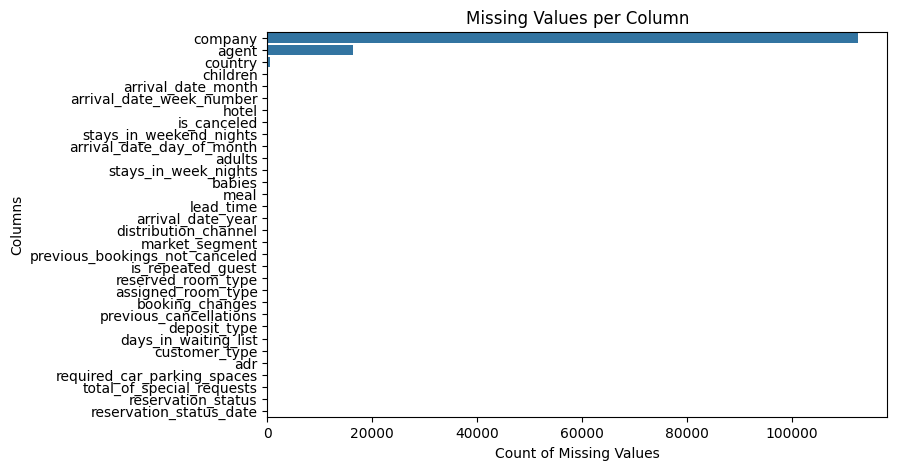

In [44]:
# Sort columns descendingly by missing values count.
missing_counts = df.isnull().sum().sort_values(ascending = False)
# Plot a bar chart
plt.figure(figsize=(8, 5))
# Making the bars horizontal to be able to read columns' name.
sns.barplot(x=missing_counts.values, y=missing_counts.index)
plt.title("Missing Values per Column")
plt.xlabel("Count of Missing Values")
plt.ylabel("Columns")
plt.show()
# Since children column only has 4 missing values, its bar is too small to be visible.

## 5: Check for duplicates

In [45]:
# Get duplicate rows count
df.duplicated().sum()

np.int64(31994)

In [46]:
# Display duplicate rows
df[df.duplicated()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0.0,0.018996,0.0,July,0.500000,0.000000,0.000000,0.04,0.036364,...,No Deposit,0.447566,NaN,0.0,Transient,0.019307,0.0,0.2,Check-Out,2015-07-03
22,Resort Hotel,0.0,0.097693,0.0,July,0.500000,0.000000,0.105263,0.08,0.036364,...,No Deposit,0.466292,NaN,0.0,Transient,0.016841,0.0,0.2,Check-Out,2015-07-07
43,Resort Hotel,0.0,0.094980,0.0,July,0.500000,0.033333,0.105263,0.06,0.036364,...,No Deposit,0.466292,NaN,0.0,Transient,0.026521,0.0,0.2,Check-Out,2015-07-07
138,Resort Hotel,1.0,0.006784,0.0,July,0.519231,0.133333,0.052632,0.00,0.036364,...,No Deposit,0.447566,NaN,0.0,Transient,0.019122,0.0,0.0,Canceled,2015-07-01
200,Resort Hotel,0.0,0.000000,0.0,July,0.519231,0.200000,0.000000,0.02,0.018182,...,No Deposit,0.447566,NaN,0.0,Transient,0.021489,0.0,0.6,Check-Out,2015-07-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0.0,0.252374,1.0,August,0.653846,1.000000,0.000000,0.06,0.036364,...,No Deposit,0.014981,NaN,0.0,Transient,0.024486,0.0,0.4,Check-Out,2017-09-03
119352,City Hotel,0.0,0.085482,1.0,August,0.653846,1.000000,0.000000,0.06,0.054545,...,No Deposit,0.014981,NaN,0.0,Transient-Party,0.037310,0.0,0.4,Check-Out,2017-09-03
119353,City Hotel,0.0,0.085482,1.0,August,0.653846,1.000000,0.000000,0.06,0.054545,...,No Deposit,0.014981,NaN,0.0,Transient-Party,0.037310,0.0,0.4,Check-Out,2017-09-03
119354,City Hotel,0.0,0.085482,1.0,August,0.653846,1.000000,0.000000,0.06,0.054545,...,No Deposit,0.014981,NaN,0.0,Transient-Party,0.037310,0.0,0.4,Check-Out,2017-09-03


## 6: Detect Outliers

In [47]:
# Get key numeric columns
numeric_cols = ["adr", "lead_time"]

# Function to calculate number of outliers for a column using IQR
def get_outliers_count(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Print column name and its outlier's count
for col in numeric_cols:
    outliers, lower_bound, upper_bound = get_outliers_count(df, col)
    print(f"Column: {col}")
    print(f"Number of outliers: {outliers.shape[0]}")
    print(f"lower_bound: {lower_bound}")
    print(f"upper_bound: {upper_bound}\n")


Column: adr
Number of outliers: 3793
lower_bound: -0.0017377616815688057
upper_bound: 0.04022007332078026

Column: lead_time
Number of outliers: 3005
lower_bound: -0.26458616010854813
upper_bound: 0.5061058344640433



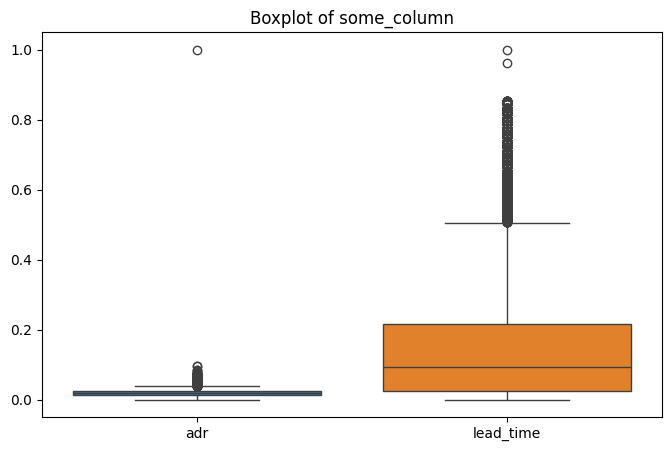

In [48]:
# Plot the two columns to look at the outliers
plt.figure(figsize=(8, 5))
sns.boxplot(data=df[["adr", "lead_time"]])
plt.title("Boxplot of some_column")
plt.show()

## 7: Correlation with target `is_canceled`

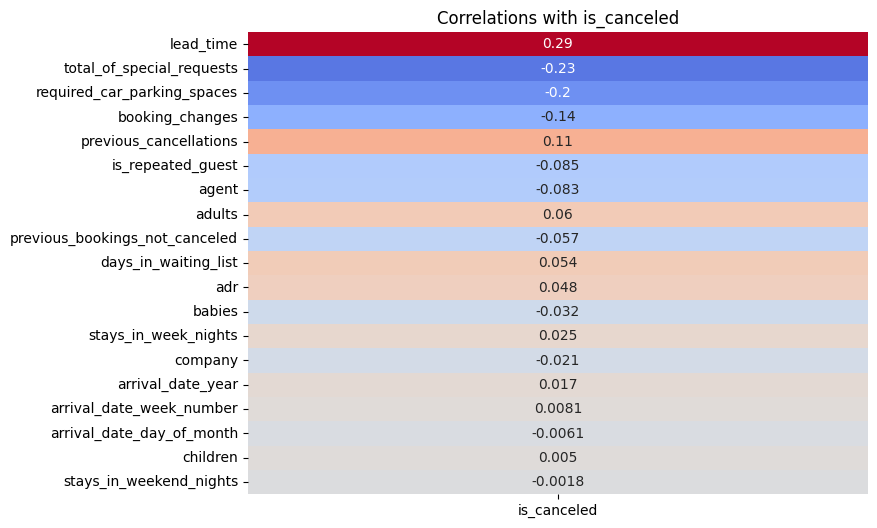

In [49]:
def plot_target_correlation():
    numeric_df = df.select_dtypes(include=['number'])
    corr = numeric_df.corr()['is_canceled'].drop('is_canceled')
    corr = corr.sort_values(key=abs, ascending=False)

    corr = corr.head(20)

    plt.figure(figsize=(8, 6))
    sns.heatmap(
        corr.to_frame(),
        annot=True, cmap="coolwarm", center=0, cbar=False
    )
    plt.title(f"Correlations with is_canceled")
    plt.show()

plot_target_correlation()

## 8: Document Findings

### Columns With Missing Data:
- `children`: 4 missing values  
- `country`: 488 missing values  
- `agent`: 16340 missing values  
- `company`: 112593 missing values

We will need to handle these column's missing values.



### Key Numeric Columns Outliers:
- `adr` 3793 outliers (with one value being extremely larger than the rest)
- `lead_time` 3005 outliers

We will need to handle these column's outliers.


### Duplicated Rows:
 found 31994 duplicated rows that need to be removed.

# Phase 2: Data Cleaning

## 1: Handle Missing Values

In [50]:
#df['children'].fillna(df['children'].mean(), inplace=True)
# df['country'].fillna(df['country'].mode()[0], inplace=True)
df['agent'].fillna(0, inplace=True)
df['company'].fillna(0, inplace=True)

df['children'].fillna(df['children'].median(), inplace=True)
df['country'].fillna('Unknown', inplace=True)
# df['agent'].fillna('None', inplace=True)
# df['company'].fillna('None', inplace=True)

In [51]:
# Make sure there is no more missing values
print(df.isnull().sum().sum())

0


## 2: Remove Duplicates

In [52]:
# resetting index
df = df.drop_duplicates().reset_index(drop=True)

In [53]:
# Make sure there is no more duplicated rows
df.duplicated().sum()

np.int64(0)

## 3: Handle Outliers

In [54]:
# Clip adr and lead_time at the 1st and 99th percentile.
lower = df['adr'].quantile(0.01)
upper = df['adr'].quantile(0.99)
df['adr'] = df['adr'].clip(lower, upper)

lower = df['lead_time'].quantile(0.01)
upper = df['lead_time'].quantile(0.99)
df['lead_time'] = df['lead_time'].clip(lower, upper)

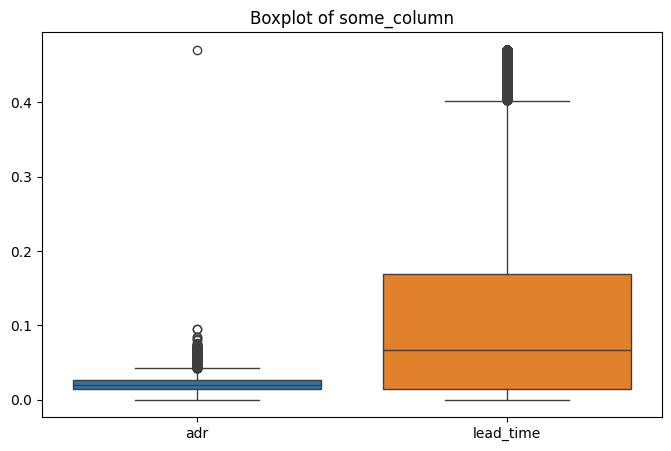

In [55]:
# Plotting the two columns again to look at the change
plt.figure(figsize=(8, 5))
sns.boxplot(data=df[["adr", "lead_time"]])
plt.title("Boxplot of some_column")
plt.show()

## 4: Fix DataTypes

In [56]:
# Convert all objects to strings then change reservation_status_date to date time
df = df.astype({col: "string" for col in df.select_dtypes(include="object").columns})

# Convert children, agent and company to integer since they cant be decimal
df["children"] = df["children"].astype(int)
df["agent"] = df["agent"].astype(int)
df["company"] = df["company"].astype(int)


In [57]:
# Check on datatypes now
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87396 entries, 0 to 87395
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  string 
 1   is_canceled                     87396 non-null  float64
 2   lead_time                       87396 non-null  float64
 3   arrival_date_year               87396 non-null  float64
 4   arrival_date_month              87396 non-null  string 
 5   arrival_date_week_number        87396 non-null  float64
 6   arrival_date_day_of_month       87396 non-null  float64
 7   stays_in_weekend_nights         87396 non-null  float64
 8   stays_in_week_nights            87396 non-null  float64
 9   adults                          87396 non-null  float64
 10  children                        87396 non-null  int64  
 11  babies                          87396 non-null  float64
 12  meal                            

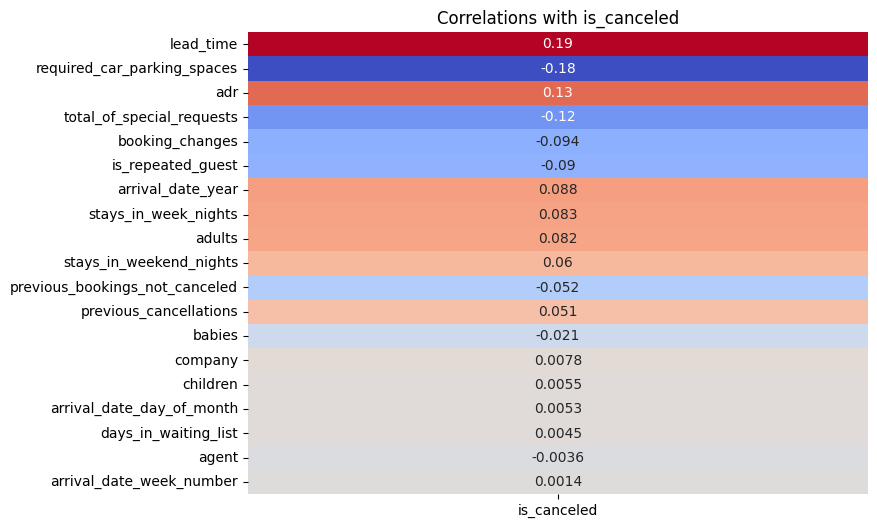

In [58]:
# take another look at the correlation after data cleaning
plot_target_correlation()

# Phase 3: Feature Engineering

## 1: New Features


In [59]:
df['total_guests'] = df['adults'] + df['children'] + df['babies']
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
df['is_family'] = (df['children'] + df['babies']) > 0

## 2: Encode Features

### Find unique value count

In [60]:
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")

hotel: 2
is_canceled: 2
lead_time: 348
arrival_date_year: 3
arrival_date_month: 12
arrival_date_week_number: 53
arrival_date_day_of_month: 31
stays_in_weekend_nights: 17
stays_in_week_nights: 35
adults: 14
children: 2
babies: 5
meal: 5
country: 178
market_segment: 8
distribution_channel: 5
is_repeated_guest: 2
previous_cancellations: 15
previous_bookings_not_canceled: 73
reserved_room_type: 10
assigned_room_type: 12
booking_changes: 21
deposit_type: 3
agent: 2
company: 2
days_in_waiting_list: 128
customer_type: 4
adr: 8879
required_car_parking_spaces: 5
total_of_special_requests: 6
reservation_status: 3
reservation_status_date: 926
total_guests: 22
total_nights: 85
is_family: 2


### Look for any format inconsistency

In [61]:
string_cols = df.select_dtypes(include='string').columns

for col in string_cols:
    print(f"Column '{col}':")
    print(df[col].unique())
    print("-" * 40)

Column 'hotel':
<StringArray>
['Resort Hotel', 'City Hotel']
Length: 2, dtype: string
----------------------------------------
Column 'arrival_date_month':
<StringArray>
[     'July',    'August', 'September',   'October',  'November',  'December',
   'January',  'February',     'March',     'April',       'May',      'June']
Length: 12, dtype: string
----------------------------------------
Column 'meal':
<StringArray>
['BB', 'FB', 'HB', 'SC', 'Undefined']
Length: 5, dtype: string
----------------------------------------
Column 'country':
<StringArray>
[    'PRT',     'GBR',     'USA',     'ESP',     'IRL',     'FRA', 'Unknown',
     'ROU',     'NOR',     'OMN',
 ...
     'ATA',     'GTM',     'ASM',     'MRT',     'NCL',     'KIR',     'SDN',
     'ATF',     'SLE',     'LAO']
Length: 178, dtype: string
----------------------------------------
Column 'market_segment':
<StringArray>
[       'Direct',     'Corporate',     'Online TA', 'Offline TA/TO',
 'Complementary',        'Groups', 

In [62]:
# See all country unique values
print(df['country'].unique().tolist())

['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 'Unknown', 'ROU', 'NOR', 'OMN', 'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD', 'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ', 'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR', 'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR', 'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR', 'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO', 'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT', 'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN', 'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD', 'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM', 'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU', 'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG', 'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP', 'KNA', 'ETH', 'IRQ', 'HND', 'RWA', 'KHM', 'MCO', 'BGD', 'IMN', 'TJK', 'NIC', 'BEN', 'VGB', 'TZA', 'GAB', 'G

### One Hot Encode low cardinalty columns

In [63]:
df = pd.get_dummies(df, columns=[
    'meal',
    'market_segment',
    'distribution_channel',
    'reserved_room_type',
    'assigned_room_type',
    'deposit_type',
    'customer_type',
    'arrival_date_month'
])

# Convert hotel to flag
df['hotel'] = df['hotel'].map({'Resort Hotel': 1, 'City Hotel': 0})

### group rare countries together in `country` column

In [64]:
# Count frequency of each country
counts = df['country'].value_counts()

# Map the frequencies to a new column
df['country_freq'] = df['country'].map(counts)

# Get a look at the frequency values to decide threshold
print(df['country_freq'].unique())

<IntegerArray>
[27453, 10433,  1875,  7252,  3016,  8837,   452,   458,   515,    18,   203,
   765,  5387,  2081,  1570,  1093,   117,  3066,  1911,   384,   561,   837,
   378,    79,   136,  1995,   422,    56,     1,   262,    44,    11,   143,
   816,    74,   232,    62,    51,    54,    65,   947,    24,    73,   213,
    78,   342,   403,     2,    23,     4,    82,   119,   202,    48,    37,
     6,    91,    80,    19,     7,    15,    30,     8,     5,    45,    69,
    16,    12,    21,    13,    25,    29,    32,    63,    40,     9,   183,
    10,    68,     3,    34,    14,    31,    26,    17,    43]
Length: 86, dtype: Int64


In [65]:
# Decided on using threshold = 100

df['country'] = df['country'].apply(
    lambda x: x if counts[x] >= 100 else 'Other'
)

print(df['country'].value_counts())

country
PRT        27453
GBR        10433
FRA         8837
ESP         7252
DEU         5387
ITA         3066
IRL         3016
Other       2337
BEL         2081
BRA         1995
NLD         1911
USA         1875
CHE         1570
CN          1093
AUT          947
SWE          837
CHN          816
POL          765
RUS          561
NOR          515
ROU          458
Unknown      452
FIN          422
ISR          403
DNK          384
AUS          378
AGO          342
LUX          262
MAR          232
TUR          213
ARG          203
HUN          202
JPN          183
IND          143
CZE          136
KOR          119
GRC          117
Name: count, dtype: int64


### Frequency Encode `Country` column

In [66]:
# Count frequency of each country
counts = df['country'].value_counts() / len(df)

# Map the frequencies to a new column
df['country_freq'] = df['country'].map(counts)

### Convert bools to 0s and 1s

In [67]:
df = df.astype({col: int for col in df.select_dtypes(include='bool').columns})

## 3: Take a final look at the data after cleaning

In [68]:
df.describe()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September,country_freq
count,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,...,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.00000,87396.000000,87396.000000
mean,0.388668,0.274898,0.107585,0.605148,0.496891,0.493851,0.052909,0.052508,0.034105,0.000011,...,0.069774,0.053698,0.115074,0.088848,0.085965,0.095599,0.057154,0.07934,0.076548,0.140121
std,0.487450,0.446466,0.113606,0.343051,0.262973,0.294505,0.054312,0.041072,0.011391,0.003383,...,0.254768,0.225422,0.319113,0.284527,0.280314,0.294043,0.232137,0.27027,0.265875,0.122735
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.001339
25%,0.000000,0.000000,0.014925,0.500000,0.288462,0.233333,0.000000,0.020000,0.036364,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.026740
50%,0.000000,0.000000,0.066486,0.500000,0.500000,0.500000,0.052632,0.040000,0.036364,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.101114
75%,1.000000,1.000000,0.169607,1.000000,0.692308,0.733333,0.105263,0.080000,0.036364,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.314122
max,1.000000,1.000000,0.470828,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.314122


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87396 entries, 0 to 87395
Data columns (total 87 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  int64  
 1   is_canceled                     87396 non-null  float64
 2   lead_time                       87396 non-null  float64
 3   arrival_date_year               87396 non-null  float64
 4   arrival_date_week_number        87396 non-null  float64
 5   arrival_date_day_of_month       87396 non-null  float64
 6   stays_in_weekend_nights         87396 non-null  float64
 7   stays_in_week_nights            87396 non-null  float64
 8   adults                          87396 non-null  float64
 9   children                        87396 non-null  int64  
 10  babies                          87396 non-null  float64
 11  country                         87396 non-null  object 
 12  is_repeated_guest               

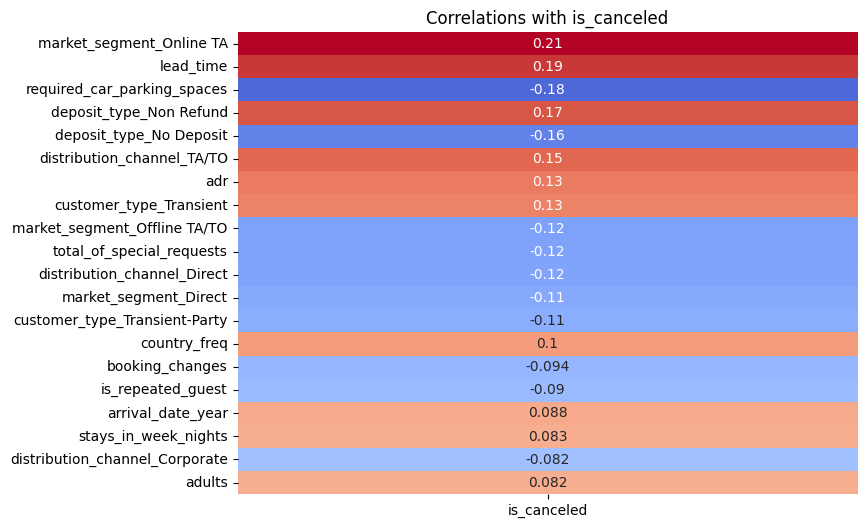

In [70]:
plot_target_correlation()

## 4: Remove Useless Features

In [71]:
df.drop(columns=['country', 'reservation_status', 'reservation_status_date'], inplace=True)

# Download cleaned dataset to check it
df.to_csv('updated_dataset.csv', index=False)

## 5: Split data to train/test sets

In [72]:
X = df.drop(columns=['is_canceled'])
y = df['is_canceled']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)